### Callin Switzer
###

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import csv
import time
from scipy import signal
import itertools as it
import sys
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import scipy.io
import glob
import itertools

# Neural net libs
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")

print(sys.version, "\n")
print("last run on " + str(datetime.now()))

Using TensorFlow backend.


TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-09-24 15:34:04.269915


In [2]:
# data directory
dataDir = r"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\Data"

# figure directory
figDir = r"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\Figures" 
if not os.path.exists(figDir):
    os.makedirs(figDir)
    
# data output
dataOut = r"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\DataOut" ""
if not os.path.exists(dataOut):
    os.makedirs(dataOut)

In [3]:
# read in data
#"D:\Dropbox\dataAnalysisForOthers\MothMuscleLength\Data\emglength_8_28.csv"

In [4]:
musLen = pd.read_csv(os.path.join(dataDir, "emglength_8_28.csv"))
musLen.drop(axis = 1, columns=musLen.columns[0], inplace=True)
print(musLen.shape)
#musLen["sec2"] = np.round(musLen.sec, decimals=4)
musLen.head(20)

(225009, 3)


,len,EMG,sec
0,-0.255774,0.058332,0.00000
1,-0.239091,0.058990,0.00004
2,-0.222407,0.059319,0.00008
3,-0.205724,0.059319,0.00012
4,-0.189040,0.058990,0.00016
5,-0.172357,0.058990,0.00020
6,-0.155673,0.058661,0.00024
7,-0.138990,0.060305,0.00028
8,-0.122306,0.058332,0.00032
9,-0.105623,0.056688,0.00036


In [5]:
comF = musLen

In [6]:
print(comF.shape)
comF.tail()

(225009, 3)


,len,EMG,sec
225004,-0.311007,0.023152,0.99984
225005,-0.313762,0.022494,0.99988
225006,-0.316516,0.023481,0.99992
225007,-0.319271,0.022165,0.99996
225008,-0.322025,0.021837,1.00000


In [7]:
sm = comF.iloc[0:25000, ].copy()


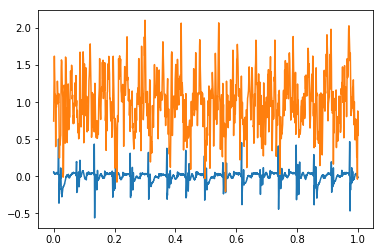

In [8]:
#plt.plot(sm.timestamp, sm.EMG)
plt.plot(sm.sec, sm.EMG)
#plt.show()
plt.plot(sm.sec, sm.len + 1)

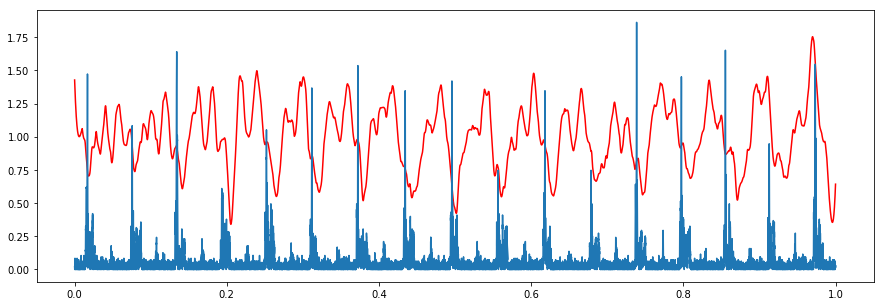

In [9]:
# try filtering b4 putting data through nnet refref

from scipy.signal import savgol_filter
yhat = savgol_filter(sm.len + 1, 501, 3) # window size 51, polynomial order 3

#plt.plot(sm.sec2,sm.length + 1)
plt.figure(figsize = (15, 5))
plt.plot(sm.sec,yhat, color='red')
plt.plot(sm.sec[:-1], abs(np.diff(sm.EMG))*2**5)
plt.show()

In [10]:
from FFTUtils import * 

In [11]:
# plot FFT spectrum
spect = FFT(sm.len, log_rate = 25000.0)

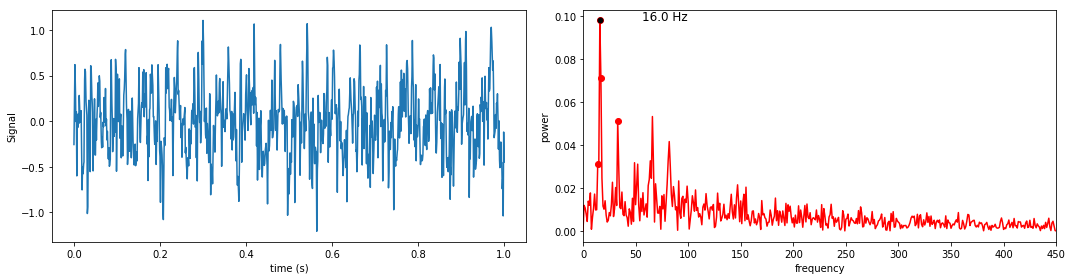

In [12]:
spect.FFT(fmin = 10, fmax = 45)
spect.plotFFT(fmin = 0, fmax =450)

In [13]:
# scale data


In [14]:
comF["ID"] = np.floor(comF.index / 25001).astype(int)

In [15]:
comF.groupby('ID').count()

,len,EMG,sec
ID,,,
0,25001,25001,25001
1,25001,25001,25001
2,25001,25001,25001
3,25001,25001,25001
4,25001,25001,25001
5,25001,25001,25001
6,25001,25001,25001
7,25001,25001,25001
8,25001,25001,25001


In [16]:
comF.head()

,len,EMG,sec,ID
0,-0.255774,0.058332,0.00000,0
1,-0.239091,0.058990,0.00004,0
2,-0.222407,0.059319,0.00008,0
3,-0.205724,0.059319,0.00012,0
4,-0.189040,0.058990,0.00016,0


In [17]:
# split apply combine
grouped = comF.groupby("ID")
grouped

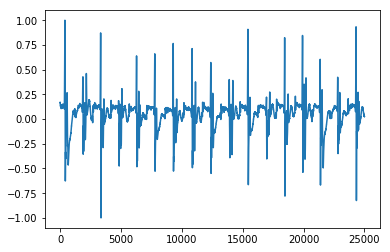

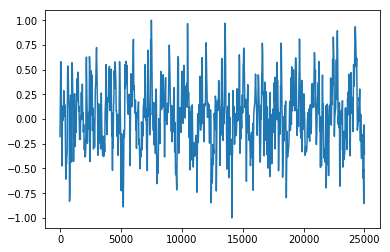

In [18]:
from sklearn.preprocessing import minmax_scale
comF['EMG_scaled'] = comF.groupby('ID').EMG.transform(lambda x: minmax_scale(x.astype(float), feature_range = (-1,1)))
comF['len_scaled'] = comF.groupby('ID').len.transform(lambda x: minmax_scale(x.astype(float), feature_range= (-1,1)))

plt.plot(comF.EMG_scaled[0:25001])
plt.show()
plt.plot(comF.len_scaled[0:25001])

___
# practice with real data
# tutorial here: https://www.youtube.com/watch?v=2np77NOdnwk
___

___
# Fully-connected nnet with windows
___

In [ ]:
# test on made-up data

In [20]:
timesteps = np.arange(0, 1, 1/25000 )

freq = 25


Y = pd.DataFrame(comF.loc[:, "len_scaled"].values)
X =  pd.DataFrame(comF.loc[:, "EMG_scaled"].values)
Y.shape

(225009, 1)

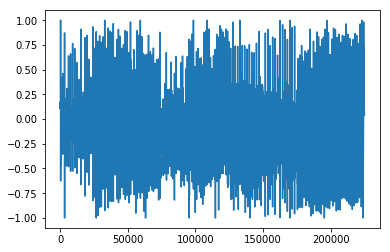

In [21]:
plt.plot(X.values)

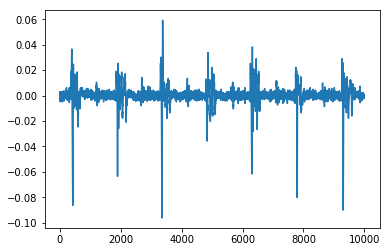

In [22]:
plt.plot(np.diff(X.values[0:10000], axis = 0 ))

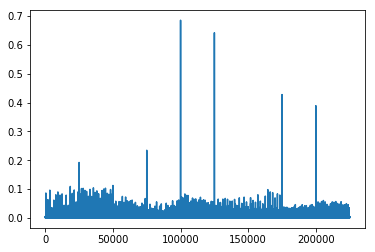

In [23]:
plt.plot(np.abs(np.diff(X.values, axis = 0 )))

In [24]:
X_sc = X.copy()
Y_sc = Y.copy()


In [25]:
split_index=  150000


from sklearn.preprocessing import MinMaxScaler

scX = MinMaxScaler(feature_range=(-0.5,0.5))
X_sc[:split_index] = scX.fit_transform(X_sc[:split_index])
X_sc[split_index:] = scX.transform(X_sc[split_index:])

scY = MinMaxScaler(feature_range=(-0.5,0.5))
Y_sc[:split_index] = scY.fit_transform(Y_sc[:split_index])
Y_sc[split_index:] = scY.transform(Y_sc[split_index:])


In [26]:
# add windows
for s in np.arange(1, 2000):
    X_sc['shift_{}'.format(s)] = X_sc[0].shift(s)
    X_sc['shift_{}'.format(s)] = X_sc[0].shift(s)


In [27]:

train_x = X_sc[:split_index].copy()
test_x = X_sc[split_index:].copy()

train_y = Y_sc[:split_index].copy()
test_y = Y_sc[split_index:].copy()

In [28]:
test_y.head()

,0
150000,0.010639
150001,0.007052
150002,0.003466
150003,-0.000121
150004,-0.003708


In [29]:
train_y.tail()

,0
149995,0.028571
149996,0.024985
149997,0.021398
149998,0.017812
149999,0.014225


In [30]:
train_x.head()

,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_1990,shift_1991,shift_1992,shift_1993,shift_1994,shift_1995,shift_1996,shift_1997,shift_1998,shift_1999
0,0.083590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.084207,0.083590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.084516,0.084207,0.083590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.084516,0.084516,0.084207,0.083590,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.084207,0.084516,0.084516,0.084207,0.08359,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
train_x.iloc[:, 0] = train_y.iloc[:,0]
#test_x.iloc[:, 0] = test_y.values
train_x.head(15)

,0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_1990,shift_1991,shift_1992,shift_1993,shift_1994,shift_1995,shift_1996,shift_1997,shift_1998,shift_1999
0,-0.088594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.081387,0.083590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.074180,0.084207,0.083590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.066973,0.084516,0.084207,0.083590,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.059767,0.084516,0.084516,0.084207,0.083590,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.052560,0.084207,0.084516,0.084516,0.084207,0.083590,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.045353,0.084207,0.084207,0.084516,0.084516,0.084207,0.083590,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.038146,0.083899,0.084207,0.084207,0.084516,0.084516,0.084207,0.083590,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.030939,0.085441,0.083899,0.084207,0.084207,0.084516,0.084516,0.084207,0.083590,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.023732,0.083590,0.085441,0.083899,0.084207,0.084207,0.084516,0.084516,0.084207,0.083590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
X_train = train_x.dropna().drop(0, axis=1)
y_train = train_x.dropna()[[0]]

X_test = test_x.dropna().drop(0, axis=1)
y_test = test_y.dropna()[[0]]

In [33]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((148001, 1999), (75009, 1999), (148001, 1), (75009, 1))

In [35]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
import keras.backend as K

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(40, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(40, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(40, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mse'])
model.summary()


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta =0.001)

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, validation_split= 0.1,
          batch_size=2**10, verbose=2,
          callbacks=[early_stop])

In [39]:
def plot_model_history(model_history, saveFig = False):
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    # summarize history for accuracy
    axs.plot(range(1,len(model_history.history['mean_squared_error'])+1),
             model_history.history['mean_squared_error'])
    axs.plot(range(1,len(model_history.history['val_mean_squared_error'])+1),
             model_history.history['val_mean_squared_error'])
    axs.set_title('Model MSE')
    axs.set_ylabel('mean_squared_error')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['val_mean_squared_error'])+1),
                   len(model_history.history['val_mean_squared_error'])/10)
    axs.legend(['train', 'val'], loc='best')
    if saveFig:
        fig.savefig(os.path.join(figDir, "ModelTraining.png"), dpi = 120, bbox_inches='tight')
    plt.show()

In [ ]:
plot_model_history(hist, saveFig = False)

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize = [20,20])
plt.plot((X_test[:, 0]) + 1)
plt.plot((y_test))
plt.plot((y_pred))

In [ ]:
plt.plot(X_train[-25000:, 0])

In [ ]:
plt.figure(figsize=[20,20])
plt.plot(X_test[:, 0] + 1)
plt.plot(y_test)

In [ ]:
X_train.shape

In [ ]:
y_pred = model.predict(X_train)

plt.plot(X_train[:, 0] + 2)
plt.plot((y_train))
plt.plot((y_pred))

In [ ]:
X_train.shape

In [ ]:
plt.plot(X_train[:, 0] + 2)
plt.plot(y_train[:, 0])

# Use LSTM 

In [36]:
X_train_t = X_train.reshape(X_train.shape[0], 1, -1)
X_test_t = X_test.reshape(X_test.shape[0], 1, -1)

In [37]:
K.clear_session()
model = Sequential()
model.add(LSTM(6, input_shape = (1, X_train_t.shape[2]), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(6, return_sequences = True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(6))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics =['mse'])

early_stop = EarlyStopping(monitor='val_loss', patience=100, verbose=1, min_delta =0.0001)

In [38]:
hist = model.fit(X_train_t, y_train, epochs=100, validation_split= 0.1,
          batch_size=2**12, verbose=2,
          callbacks=[early_stop])

Train on 133200 samples, validate on 14801 samples
Epoch 1/100
 - 10s - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 2/100
 - 7s - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 3/100
 - 8s - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 4/100
 - 7s - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 5/100
 - 7s - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 6/100
 - 7s - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 7/100
 - 7s - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 8/100
 - 7s - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 9/100
 - 7s - loss: 0.0203 - m

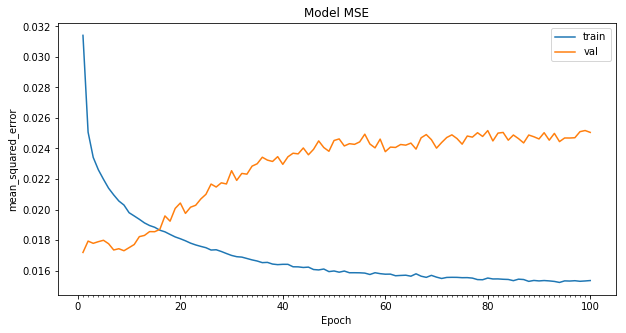

In [40]:
plot_model_history(hist, saveFig = False)

In [43]:
y_pred = model.predict(X_test_t)

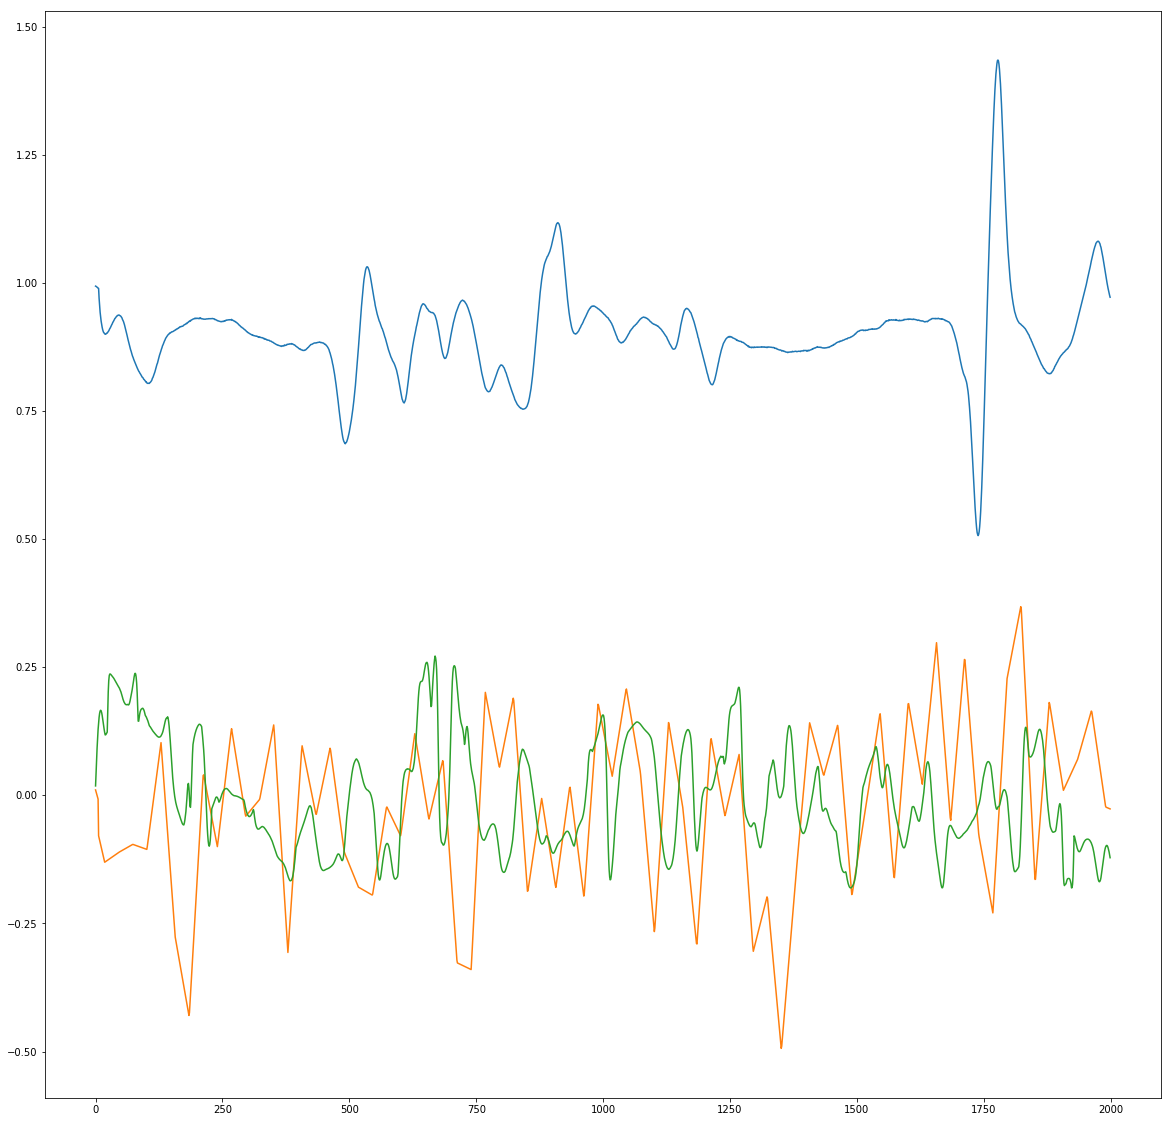

In [44]:
plt.figure(figsize = [20,20])
plt.plot((X_test[0:2000, 0]) + 1)
plt.plot((y_test[0:2000]))
plt.plot((y_pred[0:2000]))

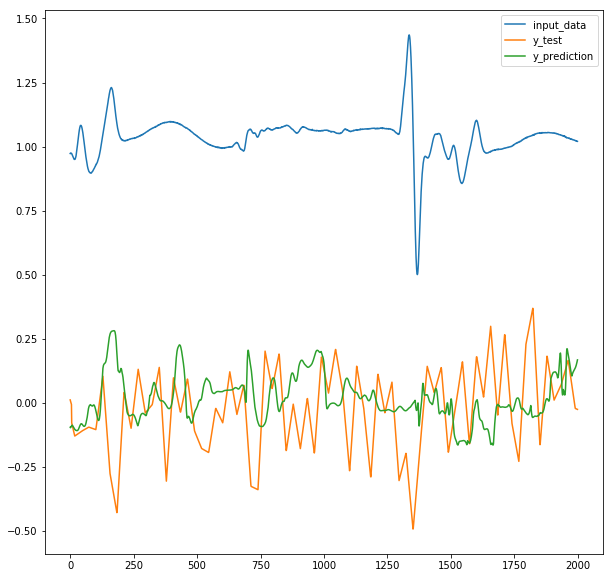

In [48]:
y_pred = model.predict(X_train_t[0:2000])

plt.figure(figsize = [10,10])
plt.plot((X_train[0:2000, 0]) + 1, label = "input_data")
plt.plot((y_test[0:2000]), label = "y_test")
plt.plot((y_pred[0:2000]), label = "y_prediction")
plt.legend()

In [ ]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_shape=(None, layers[0]),
        units=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(units = layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="adam", metrics = ['mse'])
    print("> Compilation Time : ", time.time() - start)
    return model

In [ ]:
model= build_model([1,50,100,1])
earlystop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.01, patience= 5, verbose=1, mode='auto')

In [ ]:
plt.plot(x_train[:, 499, 0])
plt.plot(y_train[:])

In [ ]:
model_info = model.fit(x_train, y_train, batch_size = 2**11, epochs=100, validation_split=0.05, callbacks = [earlystop])

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    # summarize history for accuracy
    axs.plot(range(1,len(model_history.history['mean_squared_error'])+1),model_history.history['mean_squared_error'])
    axs.plot(range(1,len(model_history.history['val_mean_squared_error'])+1),model_history.history['val_mean_squared_error'])
    axs.set_title('Model MSE')
    axs.set_ylabel('mean_squared_error')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['val_mean_squared_error'])+1),len(model_history.history['val_mean_squared_error'])/10)
    axs.legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
plot_model_history(model_info)

In [ ]:
def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [ ]:
predicted = predict_point_by_point(model, x_test)
predicted.shape

In [ ]:
plt.figure(figsize = (10, 4))
x_test.shape
plt.plot(x_test[:, 499, 0], label = "input")
#plt.plot(y_test[], label = "output")
plt.plot(y_test[-x_test.shape[0]:] + 2, label = "y")
plt.plot(minmax_scale(predicted, feature_range=(-1,1)) + 2, label = "prediction")
plt.legend()

In [ ]:
pp = model.predict(x_test)

In [ ]:
plt.plot(y_test)

In [ ]:
plt.plot(pp)

In [ ]:


plt.figure(figsize = (20, 8))
plt.plot(comF.EMG_scaled[-len(predicted):].reset_index(drop = True)+ 2, label = "EMG")
plt.plot(comF.len_scaled[-len(predicted):].reset_index(drop = True), label = "actual")
plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(comF.EMG_scaled[0:len(predicted)].reset_index(drop = True)+ 2, label = "EMG")
plt.plot(comF.len_scaled[0:len(predicted)].reset_index(drop = True), label = "actual")
#plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [ ]:
x_test.shape

In [ ]:
predicted = predict_point_by_point(model, x_train[0:25000,:,:])
predicted.shape

In [ ]:

plt.figure(figsize = (20, 8))
plt.plot(x_train[0:25000, 999, 0])
plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [ ]:
comF.EMG_scaled[0:len(predicted)].reset_index(drop = True)

In [ ]:
def reshape_dataTestONLY(sequence, ysequence, seq_len):
    sequence_length = seq_len + 1
    result = []
    for index in range(len(sequence) - sequence_length):
        result.append(sequence[index: index + sequence_length])
    result = np.array(result)
    
    result2 = []
    for index in range(len(ysequence) - sequence_length):
        result2.append(ysequence[index: index + sequence_length])
    result2 = np.array(result2)

    # shuffle windows
    #shuffInt = np.random.choice(np.arange(0, train.shape[1]), replace=False, size=train.shape[1])
#     train = train[:, shuffInt]
#     train2 = train2[:, shuffInt]
    #np.random.shuffle(train)

    x_test = result[:, :-1]
    y_test = result2[:, -1]

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    
    
    return [x_test, y_test]

In [ ]:
timesteps = np.arange(0, 0.5, 1/25000 )

freq = 25

trainY1 = np.sin(2*np.pi*timesteps* freq) + np.random.normal(size=len(timesteps))*0.1
trainX1 =  np.cos(2*np.pi*timesteps * freq) * ((np.cos(2*np.pi*timesteps*freq)) > 0.99)*1 + np.random.normal(size=len(timesteps))*0.1
trainY1.shape

In [ ]:
plt.plot(minmax_scale(trainX1[0:12500], (-1,1)))
x_test2, _ = reshape_dataTestONLY(minmax_scale(trainX1[0:12500], (-1,1)), trainY1, 1000)
plt.show()
plt.plot(x_test2[:, 999, 0])

In [ ]:
predicted = predict_point_by_point(model, x_test2)
predicted.shape

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(x_test2[:, 999, 0], label = 'made-up EMG signal')
plt.plot(minmax_scale(predicted, feature_range=(-1,1)), label = "predicted")
plt.legend()

In [ ]:
propBreak = 0.9
windowLen = 200

backCt = int(len(trainX) - propBreak * len(trainX) + propBreak * windowLen)
print(backCt)

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(trainY_scaled[-(backCt + 1):] + 2, label = "input data")
plt.plot(trainX_scaled[-(backCt-windowLen +1):], label = "data we're trying to predict")

plt.plot(x_test[:,0,0] + 2, label = "input data")
plt.plot(y_test[:], label = "ytest")
#plt.plot(yhat[-81:] -1, label = "smoothed")
plt.ylim([-2, 4])
plt.plot(predicted, label = 'predicted_LSTM')
plt.legend()
#plt.plot(y_test)
#plt.savefig(os.path.join(figDir, "LSTM_MadeUpData.png"), dpi = 500)


In [ ]:
plt.figure(figsize = (10,4))
plt.plot(trainY_scaled[-(backCt - windowLen +  1):] + 2, label = "input data")
plt.plot(trainX_scaled[-(backCt-windowLen +1):], label = "data we're trying to predict")

plt.plot(x_test[:,windowLen-1,0] + 2, label = "input data")
plt.plot(y_test[:], label = "ytest")

plt.ylim([-2, 4])
plt.plot(predicted, label = 'predicted_LSTM')
plt.legend()


In [ ]:
plt.plot(trainY_scaled[-(backCt + 1):] + 2, label = "input data")
plt.plot(trainX_scaled[(-backCt):], label = "data we're trying to predict")

In [ ]:
results = reshape_data(trainX, 50)

In [ ]:
np.random.shuffle(results)
results.shape

shuffInt = np.random.choice(np.arange(0, results.shape[1]), replace=False, size=results.shape[1])
results[:, shuffInt]

In [ ]:
shuffInt = np.random.choice(np.arange(0, result.shape[0]), replace=False, size=result.shape[0])
    train = train[:, shuffInt]